SINGLE TASK XG BOOST

In [1]:
import xgboost as xgb

# Load data
dtrain = xgb.DMatrix('train.data')
dval = xgb.DMatrix('val.data')

# Specify parameters
params = {
    'max_depth': 9,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "min_child_weight": 1,
    "gamma": 0.48,
    "subsample": 1,
    "colsample_bytree": 0.7,
    "nthread": 8,
    "scale_pos_weight": 1,
    
}

# Specify validation set for early stopping
eval_list = [(dval, 'eval'), (dtrain, 'train')]

# Train model
num_round = 1000  # Number of training rounds
bst = xgb.train(params, dtrain, num_round, eval_list, early_stopping_rounds=100)


/home/user/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-auc:0.65180	train-auc:0.95232
[1]	eval-auc:0.66375	train-auc:0.97682
[2]	eval-auc:0.66174	train-auc:0.99122
[3]	eval-auc:0.66822	train-auc:0.99533
[4]	eval-auc:0.67742	train-auc:0.99695
[5]	eval-auc:0.67726	train-auc:0.99909
[6]	eval-auc:0.69030	train-auc:0.99978
[7]	eval-auc:0.69792	train-auc:0.99994
[8]	eval-auc:0.69460	train-auc:0.99998
[9]	eval-auc:0.69179	train-auc:0.99999
[10]	eval-auc:0.69443	train-auc:1.00000
[11]	eval-auc:0.69462	train-auc:1.00000
[12]	eval-auc:0.69370	train-auc:1.00000
[13]	eval-auc:0.69786	train-auc:1.00000
[14]	eval-auc:0.70439	train-auc:1.00000
[15]	eval-auc:0.70515	train-auc:1.00000
[16]	eval-auc:0.70236	train-auc:1.00000
[17]	eval-auc:0.70388	train-auc:1.00000
[18]	eval-auc:0.70537	train-auc:1.00000
[19]	eval-auc:0.70464	train-auc:1.00000
[20]	eval-auc:0.70544	train-auc:1.00000
[21]	eval-auc:0.70795	train-auc:1.00000
[22]	eval-auc:0.71003	train-auc:1.00000
[23]	eval-auc:0.71116	train-auc:1.00000
[24]	eval-auc:0.71112	train-auc:1.00000
[25]	eval-

AUC: 0.7172106608251186
F1 Score: 0.6751361161524501


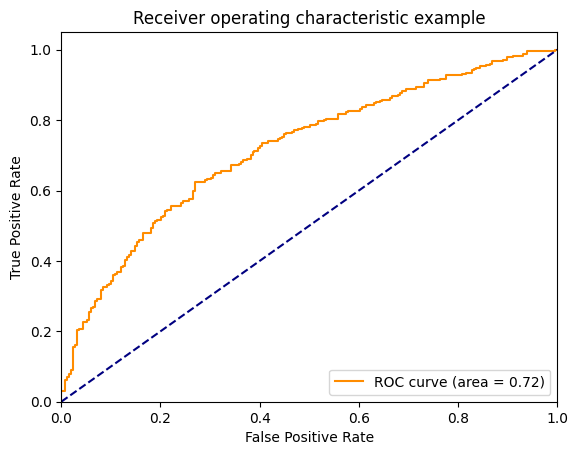

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import numpy as np

# Assume your validation labels are in a 1-D numpy array named y_val
# y_val = np.array([...])

# predict probabilities

y_pred_proba = bst.predict(dval)
# Convert predicted probabilities to class labels
y_pred_labels = (y_pred_proba > 0.5).astype(int)
# Get true labels from dval
y_val = dval.get_label()

# Calculate F1 score
f1 = f1_score(y_val, y_pred_labels)


# calculate AUC
y_val = dval.get_label()
auc = roc_auc_score(y_val, y_pred_proba)
print(f"AUC: {auc}")
print(f"F1 Score: {f1}")

# To plot ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

With Leave One Group Out Cross Validation

In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np

# load libsvm format data
X, y = load_svmlight_file('all.data')

# Convert to dense array for easier indexing
X = X.toarray()

# Extract groups
groups = X[:, 0]

In [2]:
for x in groups:
    print(x)

5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0
6.0


In [3]:
X

array([[5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 1., 0., ..., 0., 0., 0.],
       [5., 1., 0., ..., 0., 0., 0.],
       [5., 1., 0., ..., 0., 0., 0.]])

In [10]:
import xgboost as xgb
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

logo = LeaveOneGroupOut()

auc_scores = []
f1_scores = []

params = {
    'max_depth': 10,
    'eta': 0.01,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "min_child_weight": 1,
    "gamma": 0.39,
    "subsample": 0.7,
    "colsample_bytree": 0.7,
    "nthread": 10,
    "scale_pos_weight": 1,
}

for train_index, test_index in logo.split(X, y, groups):
    dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
    dtest = xgb.DMatrix(X[test_index], label=y[test_index])

    bst = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dtest, 'eval')], early_stopping_rounds=200)

    # predict probabilities
    y_pred_proba = bst.predict(dtest)
    # Convert predicted probabilities to class labels
    y_pred_labels = (y_pred_proba > 0.5).astype(int)

    # Calculate AUC
    auc = roc_auc_score(y[test_index], y_pred_proba)
    auc_scores.append(auc)
    
    # Calculate F1 score
    f1 = f1_score(y[test_index], y_pred_labels, average='macro')
    f1_scores.append(f1)
    
# Average AUC and F1 scores across all groups
avg_auc = np.mean(auc_scores)
avg_f1 = np.mean(f1_scores)

print(f"Avg AUC: {avg_auc}")
print(f"Avg F1 Score: {avg_f1}")

[0]	eval-auc:0.39976
[1]	eval-auc:0.51644
[2]	eval-auc:0.53489
[3]	eval-auc:0.54367
[4]	eval-auc:0.54513
[5]	eval-auc:0.53457
[6]	eval-auc:0.50836
[7]	eval-auc:0.51094
[8]	eval-auc:0.51337
[9]	eval-auc:0.52046
[10]	eval-auc:0.51389
[11]	eval-auc:0.50949
[12]	eval-auc:0.50169
[13]	eval-auc:0.50897
[14]	eval-auc:0.50484
[15]	eval-auc:0.50037
[16]	eval-auc:0.49030
[17]	eval-auc:0.48377
[18]	eval-auc:0.47983
[19]	eval-auc:0.48228
[20]	eval-auc:0.48887
[21]	eval-auc:0.49115
[22]	eval-auc:0.49485
[23]	eval-auc:0.49490
[24]	eval-auc:0.49129
[25]	eval-auc:0.47798
[26]	eval-auc:0.48079
[27]	eval-auc:0.48049
[28]	eval-auc:0.48605
[29]	eval-auc:0.48104
[30]	eval-auc:0.47244
[31]	eval-auc:0.46999
[32]	eval-auc:0.47128
[33]	eval-auc:0.47460
[34]	eval-auc:0.47021
[35]	eval-auc:0.45466
[36]	eval-auc:0.44531
[37]	eval-auc:0.44323
[38]	eval-auc:0.43956
[39]	eval-auc:0.44427
[40]	eval-auc:0.44951
[41]	eval-auc:0.44992
[42]	eval-auc:0.44717
[43]	eval-auc:0.44500
[44]	eval-auc:0.44620
[45]	eval-auc:0.4448

[161]	eval-auc:0.49358
[162]	eval-auc:0.49380
[163]	eval-auc:0.49439
[164]	eval-auc:0.49533
[165]	eval-auc:0.49481
[166]	eval-auc:0.49426
[167]	eval-auc:0.49458
[168]	eval-auc:0.49682
[169]	eval-auc:0.49680
[170]	eval-auc:0.49677
[171]	eval-auc:0.49772
[172]	eval-auc:0.49646
[173]	eval-auc:0.49932
[174]	eval-auc:0.50107
[175]	eval-auc:0.50049
[176]	eval-auc:0.50230
[177]	eval-auc:0.50367
[178]	eval-auc:0.50462
[179]	eval-auc:0.50368
[180]	eval-auc:0.50339
[181]	eval-auc:0.50472
[182]	eval-auc:0.50536
[183]	eval-auc:0.50677
[184]	eval-auc:0.50718
[185]	eval-auc:0.50656
[186]	eval-auc:0.50479
[187]	eval-auc:0.50443
[188]	eval-auc:0.50484
[189]	eval-auc:0.50495
[190]	eval-auc:0.50609
[191]	eval-auc:0.50843
[192]	eval-auc:0.50720
[193]	eval-auc:0.50781
[194]	eval-auc:0.50720
[195]	eval-auc:0.50751
[196]	eval-auc:0.50647
[197]	eval-auc:0.50647
[198]	eval-auc:0.50706
[199]	eval-auc:0.50585
[200]	eval-auc:0.50609
[201]	eval-auc:0.50642
[202]	eval-auc:0.50578
[203]	eval-auc:0.50465
[204]	eval-

[518]	eval-auc:0.50278
[519]	eval-auc:0.50283
[520]	eval-auc:0.50311
[521]	eval-auc:0.50240
[522]	eval-auc:0.50301
[523]	eval-auc:0.50339
[524]	eval-auc:0.50289
[525]	eval-auc:0.50252
[526]	eval-auc:0.50198
[527]	eval-auc:0.50117
[528]	eval-auc:0.50120
[529]	eval-auc:0.50141
[530]	eval-auc:0.50150
[531]	eval-auc:0.50134
[532]	eval-auc:0.50119
[533]	eval-auc:0.50119
[534]	eval-auc:0.50204
[535]	eval-auc:0.50223
[536]	eval-auc:0.50224
[537]	eval-auc:0.50191
[538]	eval-auc:0.50025
[539]	eval-auc:0.50055
[540]	eval-auc:0.50127
[541]	eval-auc:0.50162
[542]	eval-auc:0.50169
[543]	eval-auc:0.50214
[544]	eval-auc:0.50195
[545]	eval-auc:0.50252
[546]	eval-auc:0.50224
[547]	eval-auc:0.50219
[548]	eval-auc:0.50256
[549]	eval-auc:0.50198
[550]	eval-auc:0.50195
[551]	eval-auc:0.50197
[552]	eval-auc:0.50238
[553]	eval-auc:0.50237
[554]	eval-auc:0.50216
[555]	eval-auc:0.50179
[556]	eval-auc:0.50138
[557]	eval-auc:0.50148
[558]	eval-auc:0.50148
[559]	eval-auc:0.50133
[560]	eval-auc:0.50167
[561]	eval-

[313]	eval-auc:0.59674
[314]	eval-auc:0.59387
[315]	eval-auc:0.59435
[316]	eval-auc:0.59291
[317]	eval-auc:0.59195
[318]	eval-auc:0.59052
[319]	eval-auc:0.59387
[0]	eval-auc:0.51883
[1]	eval-auc:0.56235
[2]	eval-auc:0.51664
[3]	eval-auc:0.50291
[4]	eval-auc:0.50302
[5]	eval-auc:0.50701
[6]	eval-auc:0.51089
[7]	eval-auc:0.51568
[8]	eval-auc:0.52503
[9]	eval-auc:0.52287
[10]	eval-auc:0.50369
[11]	eval-auc:0.51742
[12]	eval-auc:0.52992
[13]	eval-auc:0.52332
[14]	eval-auc:0.52909
[15]	eval-auc:0.53629
[16]	eval-auc:0.53547
[17]	eval-auc:0.53081
[18]	eval-auc:0.52955
[19]	eval-auc:0.53666
[20]	eval-auc:0.53575
[21]	eval-auc:0.53996
[22]	eval-auc:0.53866
[23]	eval-auc:0.54109
[24]	eval-auc:0.54977
[25]	eval-auc:0.55289
[26]	eval-auc:0.55436
[27]	eval-auc:0.55849
[28]	eval-auc:0.54616
[29]	eval-auc:0.53731
[30]	eval-auc:0.52386
[31]	eval-auc:0.52078
[32]	eval-auc:0.51987
[33]	eval-auc:0.52569
[34]	eval-auc:0.51961
[35]	eval-auc:0.51692
[36]	eval-auc:0.51644
[37]	eval-auc:0.50937
[38]	eval-auc

[157]	eval-auc:0.54399
[158]	eval-auc:0.54220
[159]	eval-auc:0.54224
[160]	eval-auc:0.54284
[161]	eval-auc:0.54360
[162]	eval-auc:0.54392
[163]	eval-auc:0.54238
[164]	eval-auc:0.54072
[165]	eval-auc:0.54009
[166]	eval-auc:0.53935
[167]	eval-auc:0.54036
[168]	eval-auc:0.54208
[169]	eval-auc:0.54125
[170]	eval-auc:0.54192
[171]	eval-auc:0.54061
[172]	eval-auc:0.54144
[173]	eval-auc:0.54043
[174]	eval-auc:0.54066
[175]	eval-auc:0.54045
[176]	eval-auc:0.54123
[177]	eval-auc:0.54123
[178]	eval-auc:0.54047
[179]	eval-auc:0.54139
[180]	eval-auc:0.54171
[181]	eval-auc:0.54123
[182]	eval-auc:0.53958
[183]	eval-auc:0.54008
[184]	eval-auc:0.53783
[185]	eval-auc:0.53797
[186]	eval-auc:0.54003
[187]	eval-auc:0.53960
[188]	eval-auc:0.53948
[189]	eval-auc:0.54029
[190]	eval-auc:0.54153
[191]	eval-auc:0.54070
[192]	eval-auc:0.54003
[193]	eval-auc:0.53944
[194]	eval-auc:0.53850
[195]	eval-auc:0.53941
[196]	eval-auc:0.54068
[197]	eval-auc:0.53935
[198]	eval-auc:0.54148
[199]	eval-auc:0.54112
[200]	eval-

[273]	eval-auc:0.55355
[274]	eval-auc:0.55192
[275]	eval-auc:0.55347
[276]	eval-auc:0.55314
[277]	eval-auc:0.55241
[278]	eval-auc:0.55355
[279]	eval-auc:0.55273
[280]	eval-auc:0.55265
[281]	eval-auc:0.55363
[282]	eval-auc:0.55249
[283]	eval-auc:0.55119
[284]	eval-auc:0.55078
[285]	eval-auc:0.55070
[286]	eval-auc:0.55021
[287]	eval-auc:0.55119
[288]	eval-auc:0.55103
[289]	eval-auc:0.55054
[290]	eval-auc:0.55119
[291]	eval-auc:0.55070
[292]	eval-auc:0.55062
[293]	eval-auc:0.55070
[294]	eval-auc:0.55070
[295]	eval-auc:0.55111
[296]	eval-auc:0.55290
[297]	eval-auc:0.55363
[298]	eval-auc:0.55225
[299]	eval-auc:0.55298
[300]	eval-auc:0.55387
[301]	eval-auc:0.55469
[302]	eval-auc:0.55404
[303]	eval-auc:0.55509
[304]	eval-auc:0.55396
[305]	eval-auc:0.55575
[306]	eval-auc:0.55566
[307]	eval-auc:0.55623
[308]	eval-auc:0.55583
[309]	eval-auc:0.55664
[310]	eval-auc:0.55664
[311]	eval-auc:0.55697
[312]	eval-auc:0.55664
[313]	eval-auc:0.55591
[314]	eval-auc:0.55640
[315]	eval-auc:0.55754
[316]	eval-

[630]	eval-auc:0.56787
[631]	eval-auc:0.56787
[632]	eval-auc:0.56868
[633]	eval-auc:0.56779
[634]	eval-auc:0.56730
[635]	eval-auc:0.56779
[636]	eval-auc:0.56738
[637]	eval-auc:0.56730
[638]	eval-auc:0.56673
[639]	eval-auc:0.56787
[640]	eval-auc:0.56812
[641]	eval-auc:0.56706
[642]	eval-auc:0.56665
[643]	eval-auc:0.56632
[644]	eval-auc:0.56706
[645]	eval-auc:0.56787
[646]	eval-auc:0.56722
[647]	eval-auc:0.56673
[648]	eval-auc:0.56673
[649]	eval-auc:0.56673
[650]	eval-auc:0.56689
[651]	eval-auc:0.56665
[652]	eval-auc:0.56698
[653]	eval-auc:0.56746
[654]	eval-auc:0.56681
[655]	eval-auc:0.56608
[656]	eval-auc:0.56641
[657]	eval-auc:0.56600
[658]	eval-auc:0.56624
[659]	eval-auc:0.56681
[660]	eval-auc:0.56535
[661]	eval-auc:0.56527
[662]	eval-auc:0.56510
[663]	eval-auc:0.56462
[664]	eval-auc:0.56486
[665]	eval-auc:0.56494
[666]	eval-auc:0.56543
[667]	eval-auc:0.56584
[668]	eval-auc:0.56665
[669]	eval-auc:0.56657
[670]	eval-auc:0.56665
[671]	eval-auc:0.56657
[672]	eval-auc:0.56657
[673]	eval-

[159]	eval-auc:0.52419
[160]	eval-auc:0.52393
[161]	eval-auc:0.52358
[162]	eval-auc:0.52312
[163]	eval-auc:0.52334
[164]	eval-auc:0.52374
[165]	eval-auc:0.52478
[166]	eval-auc:0.52489
[167]	eval-auc:0.52552
[168]	eval-auc:0.52575
[169]	eval-auc:0.52617
[170]	eval-auc:0.52600
[171]	eval-auc:0.52684
[172]	eval-auc:0.52602
[173]	eval-auc:0.52713
[174]	eval-auc:0.52666
[175]	eval-auc:0.52746
[176]	eval-auc:0.52800
[177]	eval-auc:0.52726
[178]	eval-auc:0.52666
[179]	eval-auc:0.52623
[180]	eval-auc:0.52683
[181]	eval-auc:0.52556
[182]	eval-auc:0.52548
[183]	eval-auc:0.52624
[184]	eval-auc:0.52561
[185]	eval-auc:0.52623
[186]	eval-auc:0.52595
[187]	eval-auc:0.52728
[188]	eval-auc:0.52817
[189]	eval-auc:0.52910
[190]	eval-auc:0.52936
[191]	eval-auc:0.53082
[192]	eval-auc:0.53183
[193]	eval-auc:0.53160
[194]	eval-auc:0.53126
[195]	eval-auc:0.53093
[196]	eval-auc:0.52998
[197]	eval-auc:0.52918
[198]	eval-auc:0.52951
[199]	eval-auc:0.52884
[200]	eval-auc:0.52824
[201]	eval-auc:0.52804
[202]	eval-

In [11]:
print(f"Avg AUC: {avg_auc}")
print(f"Avg F1 Score: {avg_f1}")

Avg AUC: 0.5255128950411768
Avg F1 Score: 0.49932928379906366
